# Puzzle 1: Build a hull painting robot

### 0 --> black; 1 --> white; robot moving: 0 --> left, 1 --> right; all panels black at first; how many panels does the robot paint at least once?

In [1]:
import numpy as np
from copy import deepcopy

## Load input

In [2]:
with open('./input11.txt', 'r') as file:

    software = file.readlines()

#### Convert data to list of integers

In [3]:
software = list(map(int, software[0].split(',')))

## Calculation

In [4]:
class intcode_computer(object):
    
    def __init__(self, data):
        
        self.data = data
        self.data += [0]*100000
        self.inputs = []
        self.i = 0
        self.relative_base = 0
        self.done = False

    def step(self, input):
        self.run = True
        self.out = []
        input = [input]

        while self.run is True:
            add = (5-len(str(self.data[self.i])))*'0'
            self.data[self.i] = '{0}{1}'.format(add, str(self.data[self.i]))

            optcode = self.data[self.i][-2:]
            mode1 = self.data[self.i][-3]
            mode2 = self.data[self.i][-4]
            mode3 = self.data[self.i][-5]

            if mode1 == '0' and optcode != '99':
                param1 = int(self.data[self.data[self.i+1]])
            elif mode1 == '1' and optcode != '99':
                param1 = int(self.data[self.i+1])
            elif mode1 == '2' and optcode != '99':
                param1 = int(self.data[self.data[self.i+1]+self.relative_base])

            if optcode == '01':
                if mode2 == '0':
                    param2 = int(self.data[self.data[self.i+2]])
                elif mode2 == '1':
                    param2 = int(self.data[self.i+2])
                elif mode2 == '2':
                    param2 = int(self.data[self.data[self.i+2]+self.relative_base])
                    
                if mode3 == '0' or mode3 == '1':
                    self.data[self.data[self.i+3]] = param1 + param2
                elif mode3 == '2':
                    self.data[self.data[self.i+3]+self.relative_base] = param1 + param2
                self.i += 4

            if optcode == '02':
                if mode2 == '0':
                    param2 = int(self.data[self.data[self.i+2]])
                elif mode2 == '1':
                    param2 = int(self.data[self.i+2])
                elif mode2 == '2':
                    param2 = int(self.data[self.data[self.i+2]+self.relative_base])
                    
                if mode3 == '0' or mode3 == '1':
                    self.data[self.data[self.i+3]] = param1 * param2
                elif mode3 == '2':
                    self.data[self.data[self.i+3]+self.relative_base] = param1 * param2
                self.i += 4

            if optcode == '03':
                if len(input) > 0:
                    if mode1 == '0' or mode1 == '1':
                        self.data[self.data[self.i+1]] = input[0]
                    elif mode1 == '2':
                        self.data[self.data[self.i+1]+self.relative_base] = input[0]
                    del input[0]
                    self.i += 2
                else:
                    self.run = False
                    # print('Waiting for input.')
                    break
                    
            if optcode == '04':
                if mode1 == '0':
                    self.out.append(self.data[self.data[self.i+1]])
                    # print(self.out)
                if mode1 == '1':
                    self.out.append(self.data[self.i+1])
                    # print(self.out)
                elif mode1 == '2':
                    self.out.append(self.data[self.data[self.i+1]+self.relative_base])
                    # print(self.out)
                self.i += 2

            if optcode == '05':
                if mode2 == '0':
                    param2 = int(self.data[self.data[self.i+2]])
                elif mode2 == '1':
                    param2 = int(self.data[self.i+2])
                elif mode2 == '2':
                    param2 = int(self.data[self.data[self.i+2]+self.relative_base])
                if param1 != 0:
                    self.i = param2
                else:
                    self.i += 3

            if optcode == '06':
                if mode2 == '0':
                    param2 = int(self.data[self.data[self.i+2]])
                elif mode2 == '1':
                    param2 = int(self.data[self.i+2])
                elif mode2 == '2':
                    param2 = int(self.data[self.data[self.i+2]+self.relative_base])
                    
                if param1 == 0:
                    self.i = param2
                else:
                    self.i += 3

            if optcode == '07':
                if mode2 == '0':
                    param2 = int(self.data[self.data[self.i+2]])
                elif mode2 == '1':
                    param2 = int(self.data[self.i+2])
                elif mode2 == '2':
                    param2 = int(self.data[self.data[self.i+2]+self.relative_base])
                    
                if param1 < param2:
                    if mode3 == '0' or mode3 == '1':
                        self.data[self.data[self.i+3]] = 1
                    elif mode3 =='2':
                        self.data[self.data[self.i+3]+self.relative_base] = 1
                else:
                    if mode3 == '0' or mode3 == '1':
                        self.data[self.data[self.i+3]] = 0
                    elif mode3 == '2':
                        self.data[self.data[self.i+3]+self.relative_base] = 0
                self.i += 4

            if optcode == '08':
                if mode2 == '0':
                    param2 = int(self.data[self.data[self.i+2]])
                elif mode2 == '1':
                    param2 = int(self.data[self.i+2])
                if mode2 == '2':
                    param2 = int(self.data[self.data[self.i+2]+self.relative_base])

                if param1 == param2:
                    if mode3 == '0' or mode3 == '1':
                        self.data[self.data[self.i+3]] = 1
                    elif mode3 == '2':
                        self.data[self.data[self.i+3]+self.relative_base] = 1
                else:
                    if mode3 == '0' or mode3 == '1':
                        self.data[self.data[self.i+3]] = 0
                    elif mode3 == '2':
                        self.data[self.data[self.i+3]+self.relative_base] = 0
                self.i += 4
            
            if optcode == '09':
                self.relative_base += param1
                self.i += 2

            if optcode == '99':
                self.run = False
                self.done = True
                self.i += 1
                
        return self.out

In [5]:
class robot(object):
    
    def __init__(self, start_color, width=100, height=100):
        
        self.width = width
        self.height = height
        self.area = np.zeros((self.height, self.width), dtype='object')
        self.covered = np.zeros((self.height, self.width))
        self.position = (int(self.height/2), int(self.width/2))
        self.area[self.position] = start_color
        self.direction = 'u'
        self.turnset = {'u': {'0': 'l', '1': 'r'}, 'l': {'0': 'd', '1': 'u'},
                        'd': {'0': 'r', '1': 'l'}, 'r': {'0': 'u', '1': 'd'}}
        self.moveset = {'u': (-1, 0), 'd': (1, 0), 'r': (0, 1), 'l': (0, -1)}
        self.camera = start_color
        
    def step(self, color, turn):
        
        self.area[self.position] = color
        self.covered[self.position] = 1
        self.direction = self.turnset['{0}'.format(self.direction)]['{0}'.format(turn)]
        self.position = tuple(np.add(self.position, self.moveset['{0}'.format(self.direction)]))
        self.camera = self.area[self.position]

In [6]:
computer = intcode_computer(deepcopy(software))
rob = robot(start_color=0, width=200, height=200)
while computer.done == False:
    output = computer.step(rob.camera)
    rob.step(output[0], output[1])
    
print('The number of visited panels is {0}.'.format(len(np.argwhere(rob.covered>0))))

The number of visited panels is 1785.


# Puzzle 2: Get the registration identifier

In [7]:
computer = intcode_computer(deepcopy(software))
rob = robot(start_color=1, width=200, height=200)
while computer.done == False:
    output = computer.step(rob.camera)
    rob.step(output[0], output[1])
    
print('The number of visited panels is {0}.'.format(len(np.argwhere(rob.covered>0))))

The number of visited panels is 249.


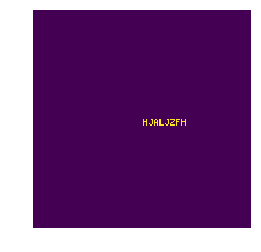

In [9]:
import matplotlib.pyplot as plt

plt.imshow(np.array(rob.area, dtype=float))
plt.axis('off')
plt.show()